In [1]:
import numpy as np 
import keras
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences #pad_sequences is used to ensure that all sequences in a list have the same length. By default this is done by padding 0 in the beginning of each sequence until each sequence has the same length as the longest sequence.
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Conv1D,MaxPooling1D
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from keras.utils.np_utils import to_categorical  #to convert an integer label into a vector 
import re #to use regular expression. Regular expressions are usually used for string matching
import warnings
warnings.filterwarnings('ignore')
import keras.callbacks
from keras.callbacks import CSVLogger
from keras.callbacks import TensorBoard
from pandas_ml import ConfusionMatrix
%matplotlib inline
import sklearn
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt

Using TensorFlow backend.


### loading data

In [2]:
train_data = pd.read_csv('D:/sem2/signal processing/Arrhythmia/Datas/mitbih_train.csv')


In [3]:
test_data = pd.read_csv('D:/sem2/signal processing/Arrhythmia/Datas/mitbih_test.csv')

In [15]:
train_data=np.array(train_data)
test_data=np.array(test_data)

In [16]:
x_train=train_data[:,0:187]
y_train=train_data[:,187]
y_train.shape

(87553,)

In [17]:
x_test=test_data[:,0:187]
y_test=test_data[:,187]
y_test.shape

(21891,)

In [18]:
y_label=y_test
y_label.shape

(21891,)

In [19]:
scalar=Normalizer().fit(x_train)
x_train=scalar.transform(x_train)

In [20]:
scalar=Normalizer().fit(x_test)
x_test=scalar.transform(x_test)

In [21]:
num_classes=5
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [22]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
input_shape=np.shape(x_train[0,:])
x_train.shape

(87553, 187, 1)

In [23]:
y_train.shape

(87553, 5)

In [24]:
model=Sequential()
model.add(Conv1D(64, kernel_size=3, border_mode="same",activation='relu', input_shape=(input_shape)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5,activation='softmax'))
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 187, 64)           256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 93, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5952)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               761984    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 645       
Total params: 762,885
Train

C:\Users\Sreelakshmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(64, kernel_size=3, activation="relu", input_shape=(187, 1), padding="same")`
  


In [25]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

checkpointer=keras.callbacks.ModelCheckpoint(filepath="D:/sem2/signal processing/Arrhythmia/.ipynb_checkpoints-{epoch:02d}.hdf5",verbose=1,save_best_only=True,monitor='loss')
csv_logger=CSVLogger("D:/sem2/signal processing/Arrhythmia/trainanalysis1.csv",separator=',',append=False)

y_score=model.fit(x_train, y_train,batch_size=100,epochs=1,verbose=1,callbacks=[checkpointer,csv_logger])
model.save('D:/sem2/signal processing/Arrhythmia/model.h5')  # creates a HDF5 file 'my_model.h5'


Instructions for updating:
Use tf.cast instead.
Epoch 1/1
87553/87553 [==============================] - 30s 346us/step - loss: 0.3702 - acc: 0.8941

Epoch 00001: loss improved from inf to 0.37019, saving model to D:/sem2/signal processing/Arrhythmia/.ipynb_checkpoints-01.hdf5


In [26]:
model.load_weights("model.h5")

In [27]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
input_shape=np.shape(x_test[0,:])
y_predict=model.predict_classes(x_test)

np.savetxt('expectedcheckpoint.txt',y_test,fmt='%01d')
np.savetxt('predictcheckpoint.txt',y_predict,fmt='%01d')
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
loss,accuracy=model.evaluate(x_test,y_test)
print("\nLoss: %.2f,Accuracy: %.2f%%" % (loss,accuracy*100))

21891/21891 [==============================] - 3s 118us/step

Loss: 0.24,Accuracy: 93.50%


In [28]:
y_predict.shape
y_label.shape

(21891,)

Confusion matrix:
Predicted      0    1     2   3     4  __all__
Actual                                        
0          17894    7   190  19     7    18117
1            393  125    36   0     2      556
2            307    1  1102  28    10     1448
3            108    0    17  37     0      162
4            198    0   101   0  1309     1608
__all__    18900  133  1446  84  1328    21891


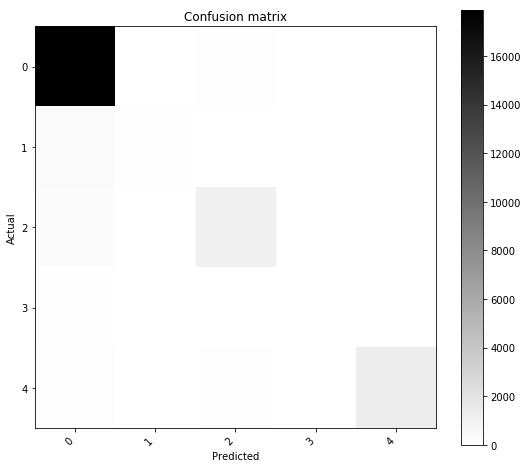

In [29]:
confusion_matrix = ConfusionMatrix(y_label, y_predict)
import matplotlib.pyplot as plt
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot()

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[17894     7   190    19     7]
 [  393   125    36     0     2]
 [  307     1  1102    28    10]
 [  108     0    17    37     0]
 [  198     0   101     0  1309]]
Normalized confusion matrix
[[9.88e-01 3.86e-04 1.05e-02 1.05e-03 3.86e-04]
 [7.07e-01 2.25e-01 6.47e-02 0.00e+00 3.60e-03]
 [2.12e-01 6.91e-04 7.61e-01 1.93e-02 6.91e-03]
 [6.67e-01 0.00e+00 1.05e-01 2.28e-01 0.00e+00]
 [1.23e-01 0.00e+00 6.28e-02 0.00e+00 8.14e-01]]


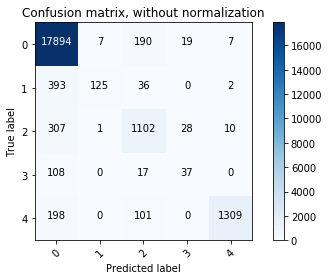

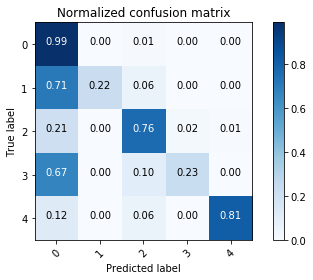

In [30]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_label, y_predict)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['0','1','2','3','4'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [31]:
sklearn.metrics.precision_score(y_label, y_predict, average=None)

array([0.95, 0.94, 0.76, 0.44, 0.99])

In [32]:
sklearn.metrics.recall_score(y_label, y_predict, average=None)

array([0.99, 0.22, 0.76, 0.23, 0.81])

In [33]:
sklearn.metrics.f1_score(y_label, y_predict, average=None)

array([0.97, 0.36, 0.76, 0.3 , 0.89])

In [34]:
from sklearn.metrics import classification_report
sklearn.metrics.classification_report(y_label, y_predict)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4']
print(classification_report(y_label, y_predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.95      0.99      0.97     18117
     class 1       0.94      0.22      0.36       556
     class 2       0.76      0.76      0.76      1448
     class 3       0.44      0.23      0.30       162
     class 4       0.99      0.81      0.89      1608

   micro avg       0.93      0.93      0.93     21891
   macro avg       0.81      0.60      0.66     21891
weighted avg       0.93      0.93      0.93     21891

